In [2]:
import pandas as pd
import os
import warnings
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
warnings.filterwarnings("ignore")
os.chdir(r"C:\Users\ezkiska\Videos\Imarticus\Python\3rd week 21st nd 22nd dec\sun 22 Logistic Reg nd K mean\cancerData\cancerData")
cancer_data = pd.read_csv('cancerdata.csv')

In [3]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [4]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [5]:
cancer_data = cancer_data.drop(['id'], axis=1)
#Let's focus on Target variable now  which is diagnosis
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
cancer_data.isnull().sum() # check for null values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
cancer_data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst

In [8]:
#Let's map Target as 1 and 0

cancer_data['diagnosis'] = cancer_data.diagnosis.map({'B':0, 'M':1})

In [10]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,0.483918,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,0.000000,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,0.000000,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,0.000000,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,1.000000,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,1.000000,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


In [11]:
cancer_data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst

In [13]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [14]:
cancer_data.shape

(569, 31)

In [15]:
cancer_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [16]:
#calculation proportioon
major = np.round(cancer_data.diagnosis.value_counts()[0]/cancer_data.shape[0],3)*100
minor = 100 - major # fairly balanced data

In [17]:
major

62.7

In [18]:
minor

37.3

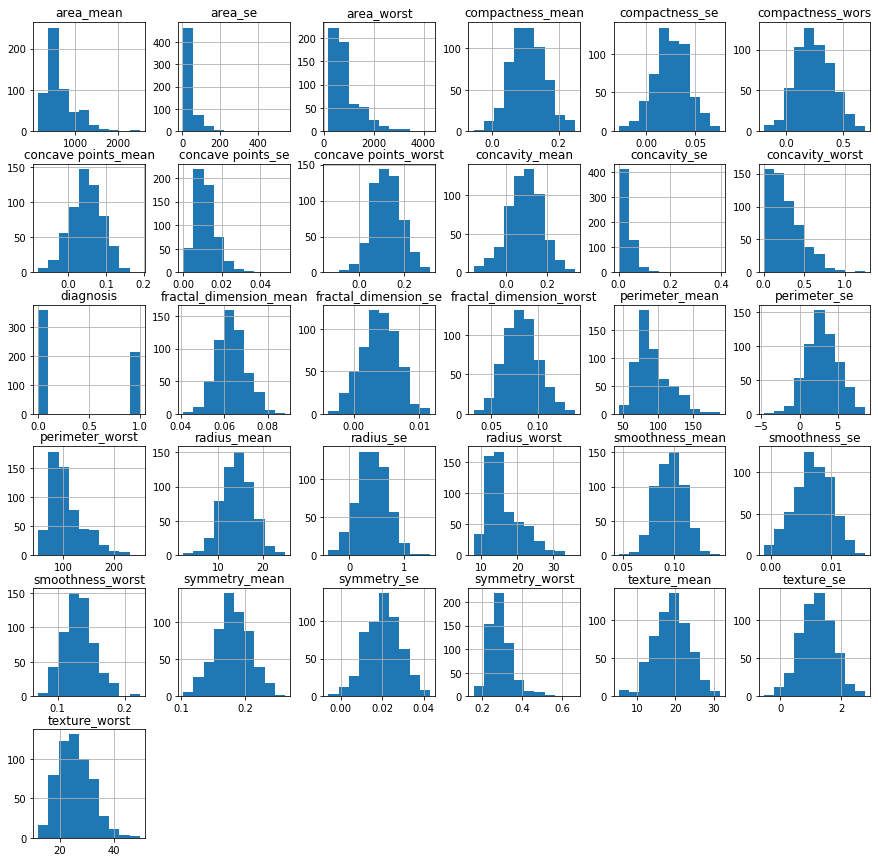

In [19]:
# Plot histograms for each variable
cancer_data.hist(figsize = (15, 15))
plt.show()

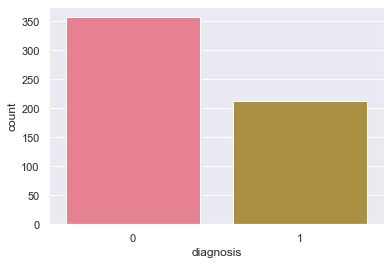

In [20]:
'''
DATA VISUALISATION
'''

sns.set(style='darkgrid', palette='husl', 
        font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.countplot(x=cancer_data['diagnosis'], data = cancer_data)

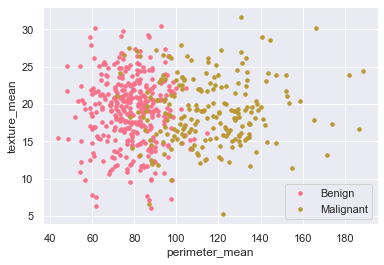

In [21]:
groups = cancer_data.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.perimeter_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.xlabel("perimeter_mean")
plt.ylabel("texture_mean")
plt.show() 

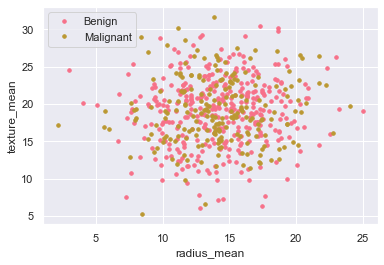

In [22]:
groups = cancer_data.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.radius_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("texture_mean")
plt.xlabel("radius_mean")
plt.show()

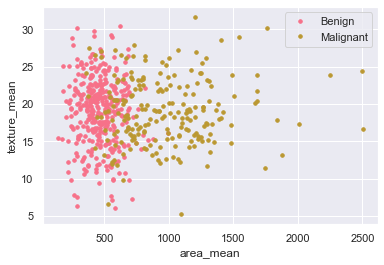

In [23]:
groups = cancer_data.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.area_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("texture_mean")
plt.xlabel("area_mean")
plt.show() 

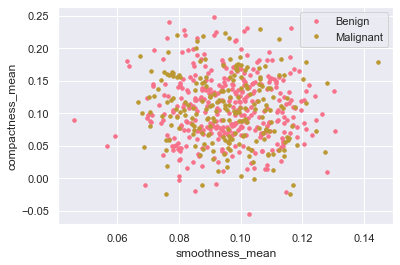

In [24]:
groups = cancer_data.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.smoothness_mean, group.compactness_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("compactness_mean")
plt.xlabel("smoothness_mean")
plt.show() 

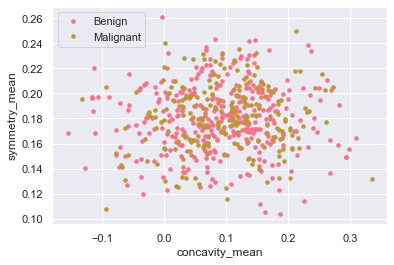

In [25]:
groups = cancer_data.groupby('diagnosis')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.concavity_mean, group.symmetry_mean, marker='o', linestyle='',
            ms = 3.5, label = 'Malignant' if name ==1 else 'Benign')
ax.legend()
plt.xlabel ("concavity_mean")
plt.ylabel ("symmetry_mean")
plt.show()

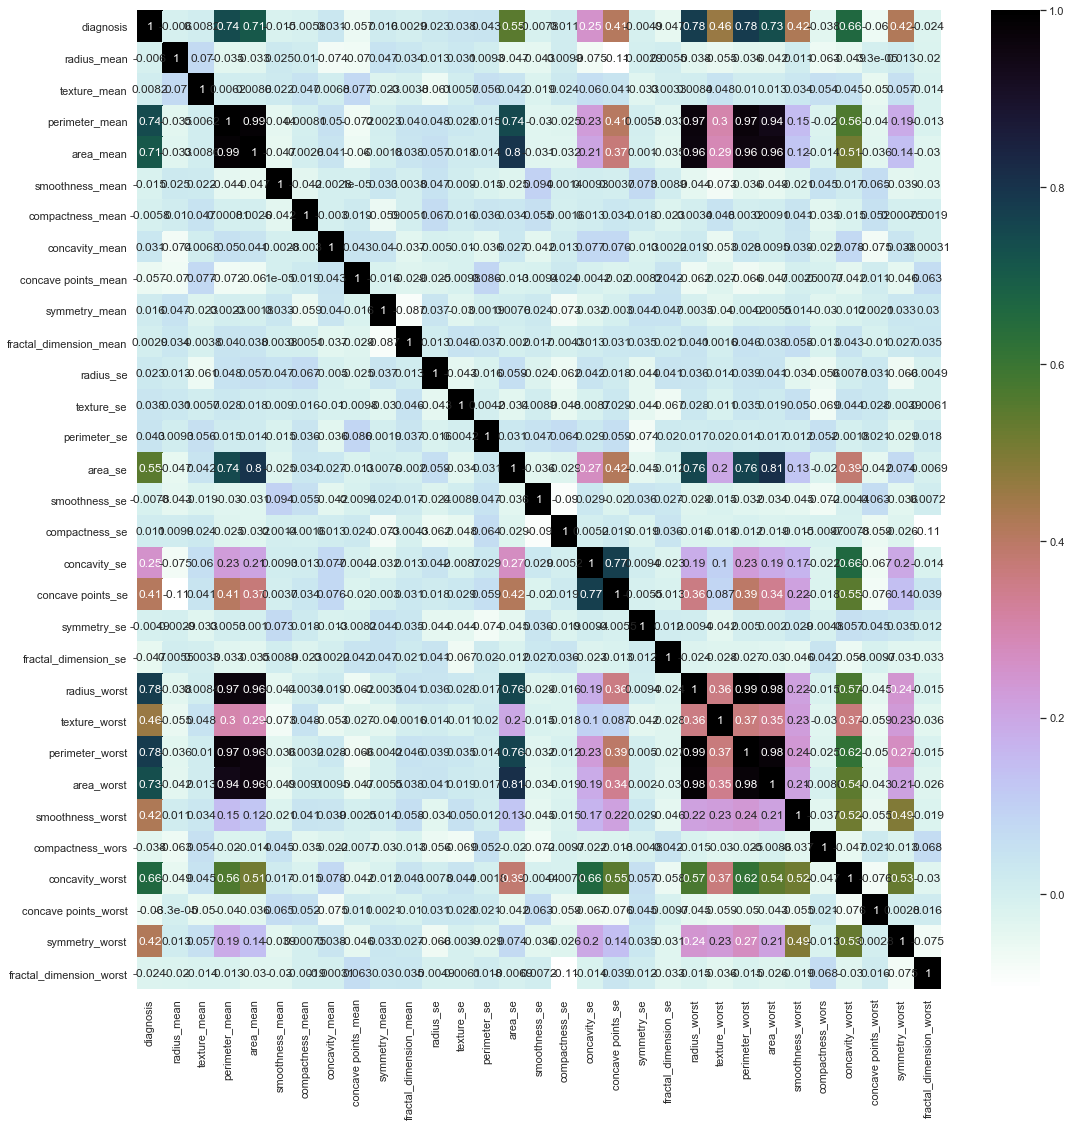

In [26]:
'''
Checking the correlation between variables

'''

plt.figure(figsize=(18,18))
sns.heatmap(cancer_data.corr(), annot= True, cmap = 'cubehelix_r')
plt.show()

********************************************************************************
WITHOUT SCALING:
The optimal number of neighbors is: 5 


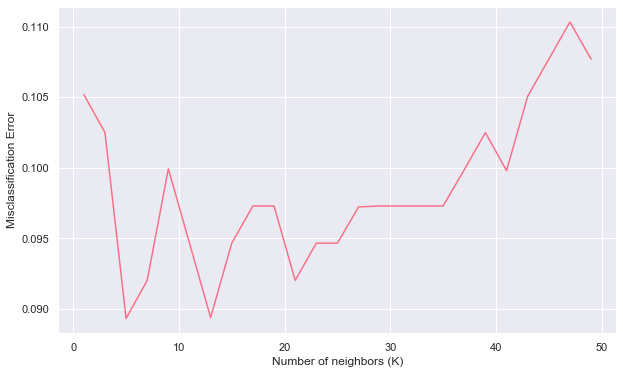

In [28]:
#Method 1 :
################################### Wihtout scaling #####################################

print('*'*80)
print('WITHOUT SCALING:')

#loading libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = np.array(cancer_data.iloc[:,1:])
y = np.array(cancer_data['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

KNN_score = knn.score(X_test,y_test)

'''
#Performing cross validation
'''
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

#Misclassification error versus k
MSE = [1-i for i in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Misclassification Error')
plt.show()

In [29]:
KNN_score

0.973404255319149

In [30]:
#Without Hyper Parameters Tuning
#importing the metrics module

from sklearn import metrics
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))


Accuracy: 0.9468085106382979
Confusion Matrix:
 [[115   4]
 [  6  63]]


In [32]:
#With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[9,11,13,15],
          'leaf_size':[25,30,35,40],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#evaluation(Accuracy)
print("Accuracy after tuning:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix after tuning:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 25, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
Accuracy after tuning: 0.973404255319149
Confusion Matrix after tuning:
 [[120   4]
 [  1  63]]


In [34]:
############################### AFter scaling ##################################################
print('*'*80)
print('AFTER SCALING:')
#loading libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#X = np.array(data.iloc[:,1:])
#y = np.array(data['diagnosis'])

scaler = StandardScaler()
Xs = scaler.fit_transform(X) # X has been scaled using z transformation (normal assumption from plotting)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs,y, test_size = 0.33, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(Xs_train,y_train)

knn.score(Xs_test,y_test)

********************************************************************************
AFTER SCALING:


0.9361702127659575

The optimal number of neighbors is: 5 


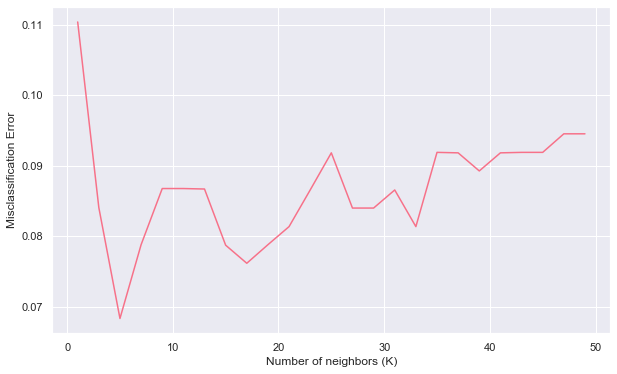

In [36]:
#Performing cross validation
neighbors = []
cv_scores_s = []
#perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores_s = cross_val_score(knn,Xs_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores_s.append(scores_s.mean())
    
    
#Misclassification error versus k
MSE_s = [1-x for x in cv_scores_s]

#determining the best k
optimal_k_s = neighbors[MSE_s.index(min(MSE_s))]
print('The optimal number of neighbors is: %d ' %optimal_k_s)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE_s)
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Misclassification Error')
plt.show()

In [37]:
#Without Hyper Parameters Tuning
#importing the metrics module
from sklearn import metrics
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(Xs_train,y_train)
#Prediction
prediction_s = model.predict(Xs_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction_s,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_s,y_test))


Accuracy: 0.9521276595744681
Confusion Metrix:
 [[121   9]
 [  0  58]]


In [38]:
#With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(Xs_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction_s = model1.predict(Xs_test)
#evaluation(Accuracy)
print("Accuracy after tuning:",metrics.accuracy_score(prediction_s,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix after tuning:\n",metrics.confusion_matrix(prediction_s,y_test))


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}
Accuracy after tuning: 0.9627659574468085
Confusion Metrix after tuning:
 [[121   7]
 [  0  60]]


********************************************************************************
Comparison


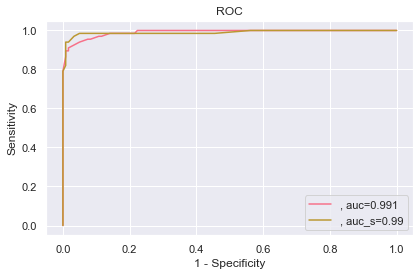

In [39]:
# Model Comparison between scaled and not scaled -----------------------------------

print('*'*80)
print('Comparison')

from sklearn.metrics import roc_auc_score, roc_curve

# for un-scaled
knn.fit(X_train, y_train)
pred_prob = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  pred_prob)
auc = roc_auc_score(y_test, pred_prob)
plt.plot(fpr,tpr,label=", auc="+str(np.round(auc,3)))
plt.legend(loc=4)
plt.tight_layout()

# for scaled
knn.fit(Xs_train, y_train)
pred_prob = knn.predict_proba(Xs_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  pred_prob)
auc_s = roc_auc_score(y_test, pred_prob)
plt.plot(fpr,tpr,label=", auc_s="+str(np.round(auc_s,3)))
plt.legend(loc=4)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.title('ROC')
plt.tight_layout()

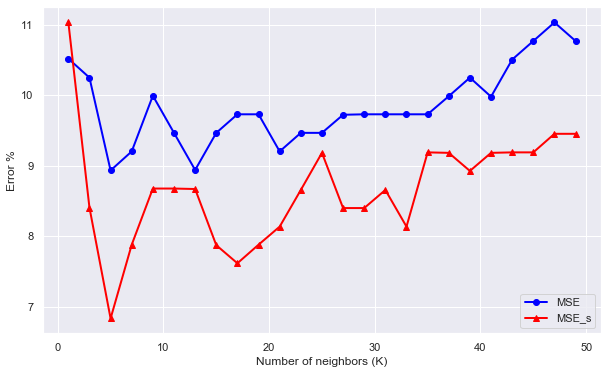

********************************************************************************
Optimal no. of neighbors without scaling:  5
Optimal no. of neighbors after scaling:  5
********************************************************************************
F1 score without scaling:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       121
           1       0.98      0.94      0.96        67

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

********************************************************************************
F1 score after scaling:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       121
           1       1.00      0.90      0.94        67

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg      

In [41]:
#plot misclassification error versus k

dic = {'K':neighbors, 'MSE':[i*100 for i in MSE], 'MSE_s':[j*100 for j in MSE_s]}
df = pd.DataFrame.from_dict(dic)#.transpose()

plt.figure(figsize = (10,6))
plt.plot('K', 'MSE', data=df, marker='o', color='blue', linewidth=2)
plt.plot('K', 'MSE_s', data=df, marker='^', color='red', linewidth=2)
plt.legend()
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Error %')
plt.show()

print('*'*80)
print('Optimal no. of neighbors without scaling: ',optimal_k)
print('Optimal no. of neighbors after scaling: ',optimal_k_s)

print('*'*80)
print('F1 score without scaling:\n', metrics.classification_report(y_test, prediction)) 
print('*'*80)
print('F1 score after scaling:\n', metrics.classification_report(y_test, prediction_s)) 